# Drying Time Predictor
Prediction of process time for drying of Grapes to Raisins

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, colors

import warnings
warnings.filterwarnings('ignore')

## Ingestion

In [6]:
import pandas as pd
path = r'../data/raw/LiteratureData_20220809.org.xlsx'
df_org = pd.read_excel(path)
df = df_org.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  91 non-null     object
 1   Unnamed: 1  91 non-null     object
 2   Unnamed: 2  91 non-null     object
 3   564         91 non-null     object
 4   84          91 non-null     object
 5   Unnamed: 5  90 non-null     object
 6   60          91 non-null     object
 7   Unnamed: 7  90 non-null     object
 8   47          91 non-null     object
 9   Unnamed: 9  90 non-null     object
 10  71          91 non-null     object
 11  8498        51 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [5]:
df.to_csv('../data/raw/raw.csv')

## Feature List

In [13]:
df.columns

Index(['Sr. No.', 'Year', 'Author', 'Exp', 'Data', 'Vel', 'Temp', 'RH',
       'hours', 'Fit', 'Variety', 'Technique', 'Pretreatment', 'P_temp',
       'P_time', 'kg_r', 'kg_m', 'Diff_r', 'Diff_m', 'Do', 'TD', 'alpha',
       'aLR', 'aRL', 'mwR', 'Density', 'Berry Count', 'Radius', 'Dry_Mass',
       'Weight_i', 'Vol_i', 'Water_i', 'MR_i', 'MC_i', 'MC_i.1', 'Weight_f',
       'Vol_f', 'Water_f', 'MC_eq_Lit', 'MC_eq_Lit.1', 'MR_f', 'MC_f',
       'MC_f.1', 'Pretreatment.1'],
      dtype='object')

In [14]:
X_redundant = ['Sr. No.', 'Year', 'Author', 'Exp','Data',]
X_measured_cat = ['Variety', 'Technique', 'Pretreatment']
X_measured_num = ['Vel', 'Temp', 'RH', 'P_temp', 'P_time',]
X_derived = ['Fit','kg_r', 'kg_m', 'Diff_r', 'Diff_m', 'Do', 'TD', 'alpha',
       'aLR', 'aRL', 'mwR', 'Density', 'Berry Count', 'Radius', 'Dry_Mass',
       'Weight_i', 'Vol_i', 'Water_i', 'MR_i', 'MC_i', 'MC_i.1', 'Weight_f',
       'Vol_f', 'Water_f', 'MC_eq_Lit', 'MC_eq_Lit.1', 'MR_f', 'MC_f',
       'MC_f.1', 'Pretreatment.1']
X_target = ['hours',]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr. No.         558 non-null    int64  
 1   Year            558 non-null    int64  
 2   Author          558 non-null    object 
 3   Exp             558 non-null    int64  
 4   Data            558 non-null    int64  
 5   Vel             558 non-null    float64
 6   Temp            558 non-null    float64
 7   RH              558 non-null    float64
 8   hours           558 non-null    int64  
 9   Fit             558 non-null    float64
 10  Variety         558 non-null    object 
 11  Technique       558 non-null    object 
 12  Pretreatment    558 non-null    object 
 13  P_temp          558 non-null    object 
 14  P_time          558 non-null    object 
 15  kg_r            9 non-null      object 
 16  kg_m            558 non-null    float64
 17  Diff_r          0 non-null      flo

## Variance in Target Variable

### Categorical Features

#### Wrt Drying Techniques

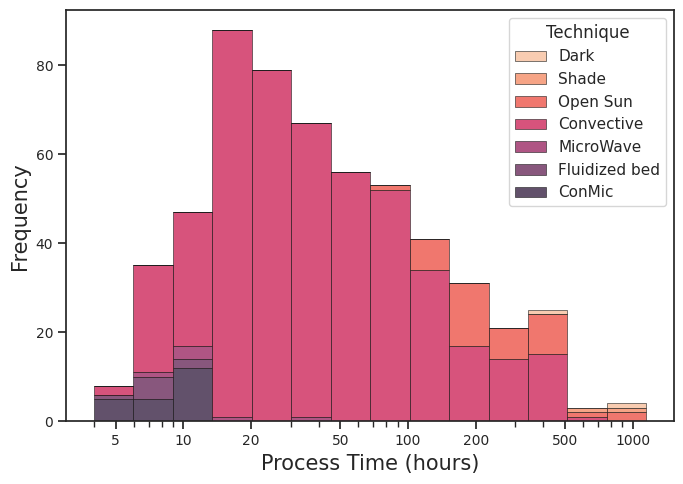

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df,
    x="hours", hue="Technique",
    multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    #alpha=0.7,
)

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout();

#### Wrt Grape Variety 

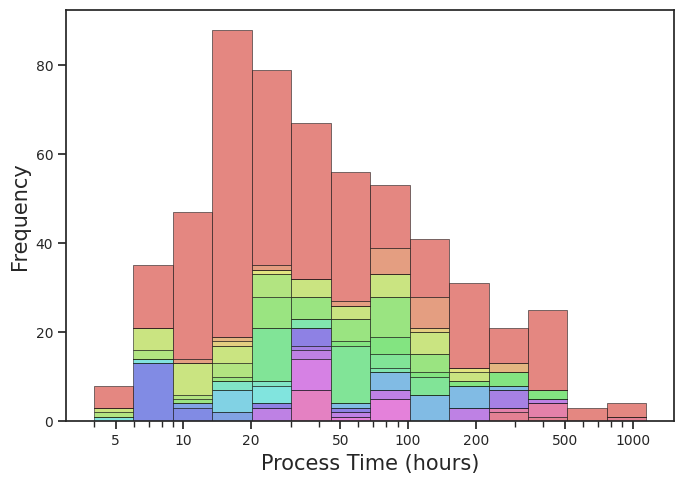

In [103]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df,
    x="hours", hue="Variety",
    multiple="stack",
    palette="hls",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout();

#### Wrt Pretreatment

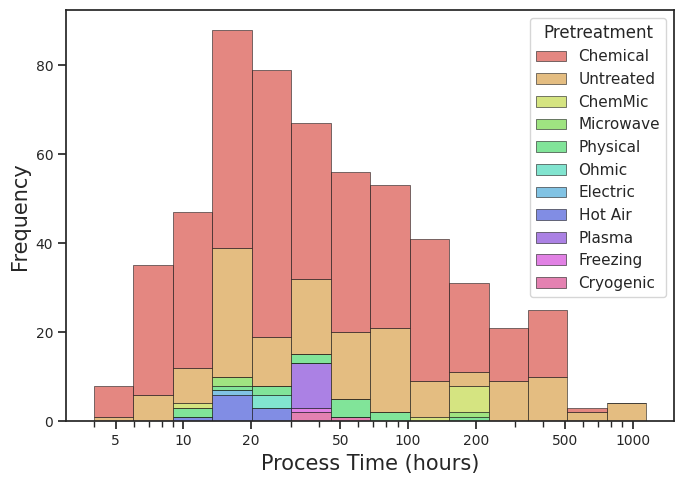

In [104]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df,
    x="hours", hue="Pretreatment",
    multiple="stack",
    palette="hls",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    #legend=False,
    #alpha=0.7,
)

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout();

### Numerical Features

#### Wrt Air Velocity

/tmp/ipykernel_498/965787272.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  f.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


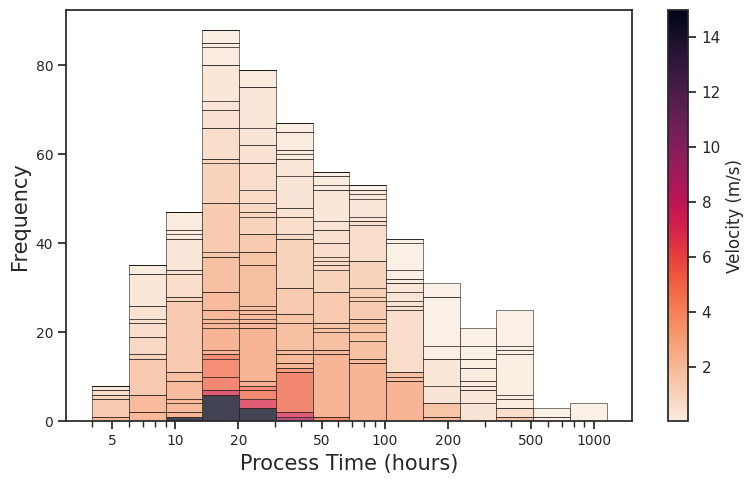

In [48]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(8, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df,
    x="hours", hue="Vel",
    multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)

my_norm = mpl.colors.Normalize(vmin=df['Vel'].min(), vmax=df['Vel'].max())
f.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='rocket_r'), 
             orientation="vertical", label='Velocity (m/s)')

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout()

#### Wrt Air Temperature

/tmp/ipykernel_498/1080131840.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  f.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


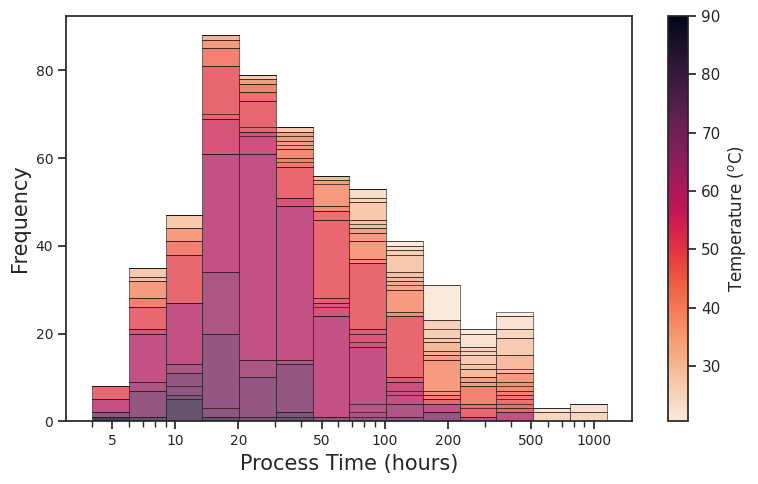

In [50]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(8, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df,
    x="hours", hue="Temp",
    multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)

my_norm = mpl.colors.Normalize(vmin=df['Temp'].min(), vmax=df['Temp'].max())
f.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='rocket_r'), 
             orientation="vertical", label='Temperature ($^{o}$C)')

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout()

#### Wrt Pretreatment Temperature

In [72]:
df['P_temp'][df['P_temp'] == 'Untreated'] = 0
df['P_temp'][df['P_temp'] == 'NotApplicable'] = 0
df['P_temp'] = pd.to_numeric(df['P_temp'], )

/tmp/ipykernel_498/717974200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_temp'][df['P_temp'] == 'Untreated'] = 0
/tmp/ipykernel_498/717974200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_temp'][df['P_temp'] == 'NotApplicable'] = 0


/tmp/ipykernel_498/1274478379.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  f.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


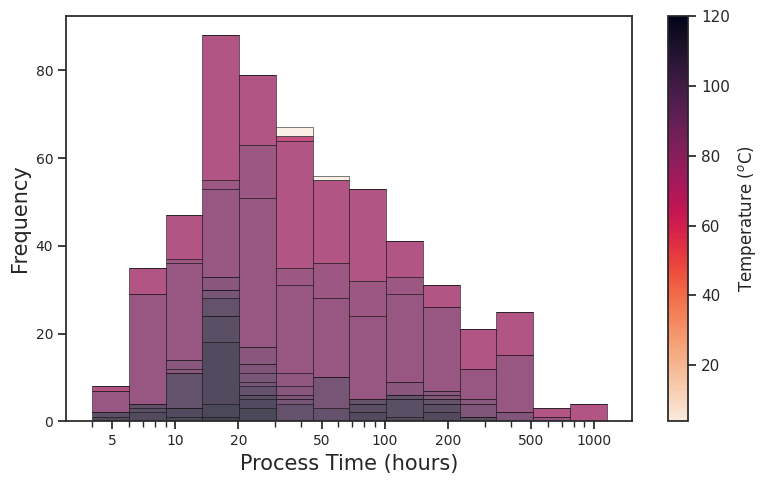

In [84]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(8, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df,
    x="hours", hue="P_temp",
    multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)

my_norm = mpl.colors.Normalize(vmin=df['P_temp'].min()+200, vmax=df['P_temp'].max())
f.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='rocket_r'), 
             orientation="vertical", label='Temperature ($^{o}$C)')

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout()

#### Wrt Pretreatment Time

In [89]:
df['P_time'][df['P_time']=='Untreated'] = 0
df['P_time'][df['P_time']=='NotApplicable'] = 0
df['P_time'] = pd.to_numeric(df['P_time'], )

/tmp/ipykernel_498/3181238966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_time'][df['P_time']=='Untreated'] = 0
/tmp/ipykernel_498/3181238966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_time'][df['P_time']=='NotApplicable'] = 0


/tmp/ipykernel_498/1779724473.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  f.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


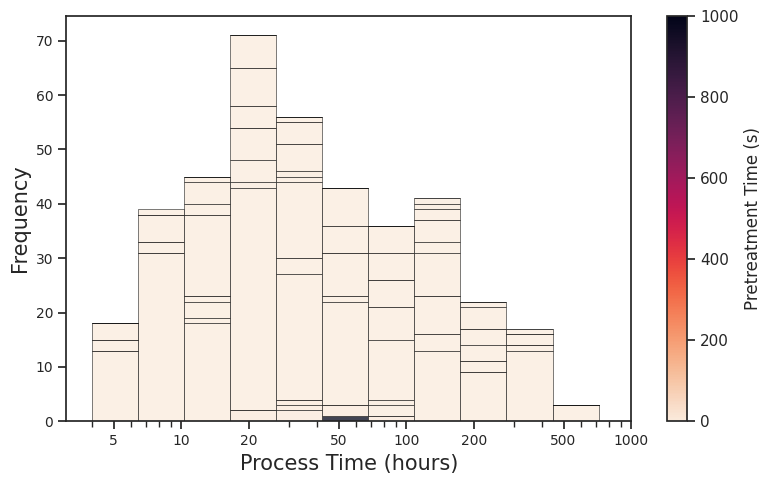

In [97]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(8, 5), dpi=100)
#sns.despine(f)

sns.histplot(
    data=df[df['P_time']!=0],
    x="hours", hue="P_time",
    multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)

my_norm = mpl.colors.Normalize(vmin=df['P_time'].min(), vmax=1000)#df['P_time'].max())
f.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='rocket_r'), 
             orientation="vertical", label='Pretreatment Time (s)')

plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Process Time (hours)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout()

# Variance in Numerical Features

#### Velocity 

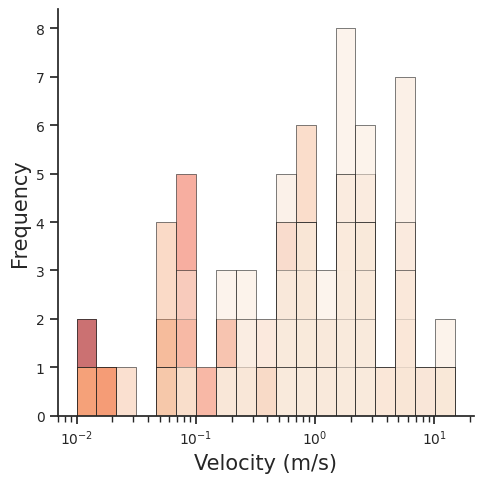

In [130]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

#f, ax = plt.subplots(figsize=(8, 5), dpi=100)
#sns.despine(f)

sns.displot(ax=ax,
    data=df[df['Vel']!=0],
    x="Vel", hue="hours",
    #multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)
"""
my_norm = mpl.colors.Normalize(vmin=df['hours'].min(), vmax=df['hours'].max())
f.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='rocket_r'), 
             orientation="vertical", label='Pretreatment Time (s)')
"""
plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Velocity (m/s)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout()

#### Temperature

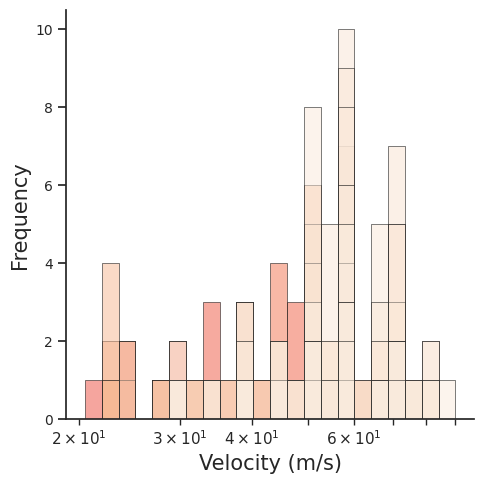

In [133]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

#f, ax = plt.subplots(figsize=(8, 5), dpi=100)
#sns.despine(f)

sns.displot(ax=ax,
    data=df[df['Temp']!=0],
    x="Temp", hue="hours",
    #multiple="stack",
    palette="rocket_r",
    edgecolor=".1",
    linewidth=.4,
    log_scale=True,
    legend=False,
    #alpha=0.7,
)
"""
my_norm = mpl.colors.Normalize(vmin=df['hours'].min(), vmax=df['hours'].max())
f.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='rocket_r'), 
             orientation="vertical", label='Pretreatment Time (s)')
"""
plt.ylabel('Frequency', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Velocity (m/s)', fontsize=15); plt.xticks(fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5,10,20, 50, 100,200, 500, 1000,])
#plt.grid(True);
plt.tight_layout()

## Process Time Vs. Temperature

### Wrt Drying Technique

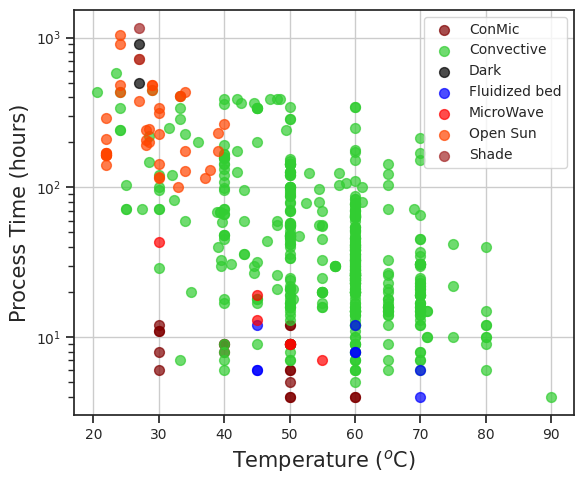

In [121]:
#%% Process time Vs Temperatures, groupby Technique
grp_Techique = df.groupby('Technique')

colors = {'MicroWave'             : 'red',
          'Convective'            : 'limegreen',
          'ConMic'                : 'maroon',
          'Fluidized bed'         : 'blue',
          'Open Sun'              : 'orangered',
          'Shade'                 : 'brown',
          'Dark'                  : 'black',}
   

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
for name, group in grp_Techique:
    ax.scatter(group['Temp'], group['hours'], marker='o', s = 50, label=name,
               color = colors[str(name)], alpha=0.7, edgecolor=colors[str(name)])
    
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
#plt.xscale('log'); 
plt.yscale('log'); 
plt.legend(fontsize=10); plt.grid(True); plt.tight_layout()

### Wrt Pretreatment Technique

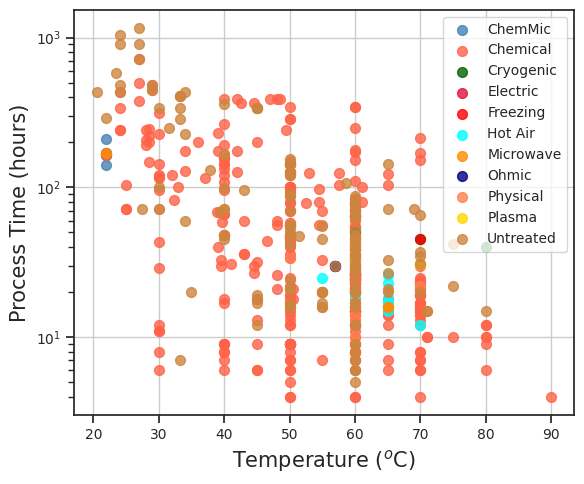

In [120]:
#%% Process time Vs Temperatures, groupby Pretreatments
groups = df.groupby('Pretreatment')

colors = ['steelblue', 'tomato', 'darkgreen',  'crimson', 'red',  
          'aqua', 'darkorange',  'navy', 'coral', 'gold', 'peru'  ]


fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
for (name, group), color in zip(groups, colors):
    ax.scatter(group['Temp'], group['hours'], marker='o', s = 50, label=name,
               color = color, alpha=0.8, edgecolor=color)
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
#plt.xscale('log'); 
plt.yscale('log'); 
plt.legend(fontsize=10); plt.grid(True);plt.tight_layout()

### Wrt Pretreatment Temeperature

/tmp/ipykernel_498/2694652769.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


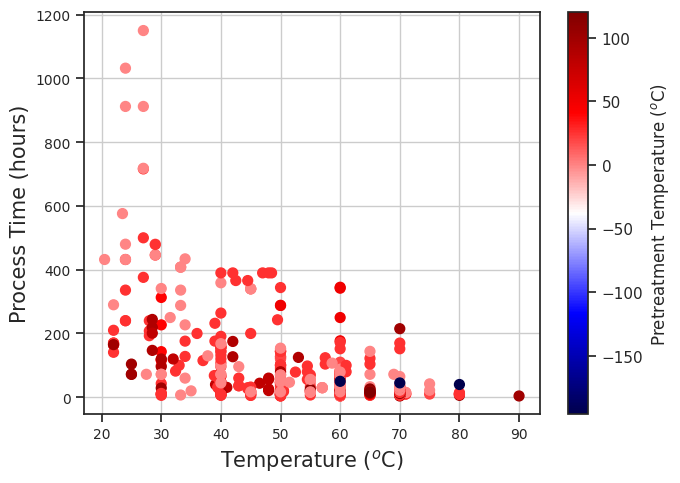

In [108]:
#%% Process time Vs Temperatures, groupby Pretreatments Temperatures
hours = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable')]['hours']#.dropna()
pTemp = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable')]['P_temp']#.dropna()
Temp  = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable')]['Temp']#.dropna()

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp, hours, marker='o', s = 50, c= pTemp, cmap = 'seismic',)
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
my_norm = mpl.colors.Normalize(vmin=pTemp.min(), vmax=pTemp.max())
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                               cmap='seismic'), 
              orientation="vertical", 
              label='Pretreatment Temperature ($^{o}$C)')

#plt.legend(fontsize=10); 
plt.grid(True); plt.tight_layout()

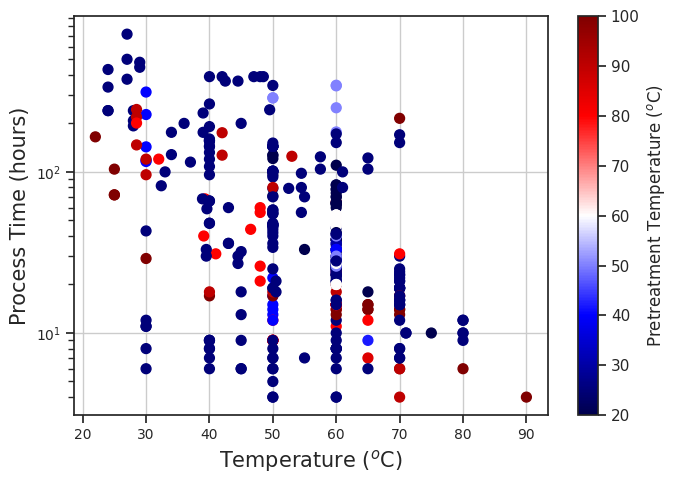

In [119]:
#%% Process time Vs Temperatures, groupby Pretreatments Temperatures Subplot for Chemical only
hours = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['hours']#.dropna()
pTemp = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['P_temp']#.dropna()
Temp  = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['Temp']#.dropna()

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp, hours, marker='o', s = 50, c= pTemp, cmap = 'seismic',)
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
my_norm = mpl.colors.Normalize(vmin=pTemp.min(), vmax=pTemp.max())
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Pretreatment Temperature ($^{o}$C)')
#plt.legend(fontsize=10); 
#plt.xscale('log'); 
plt.yscale('log'); 
plt.grid(True);plt.tight_layout()

/tmp/ipykernel_498/1391355183.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


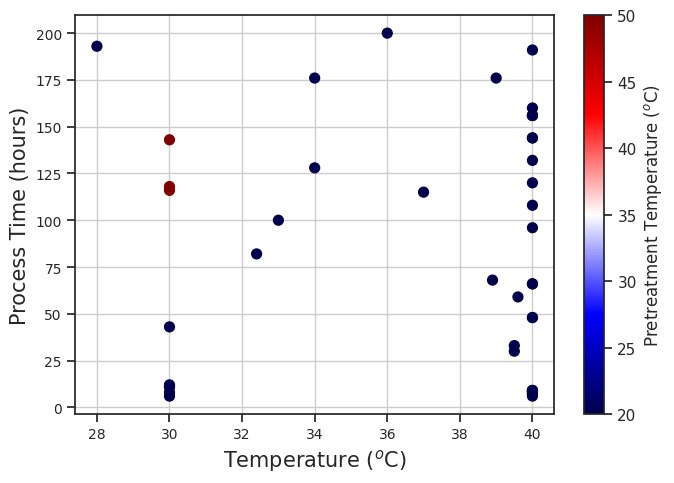

In [110]:
#%% Process time Vs Temperatures, groupby Pretreatments Temperatures Subplot for Chemical Cold only
co = 50 # v
dfcc = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]
hours = dfcc.loc[(dfcc['P_temp'] <= co) & (df['hours']<=200) & (df['Temp']<=40)]['hours']#.dropna()
pTemp = dfcc.loc[(dfcc['P_temp'] <= co) & (df['hours']<=200) & (df['Temp']<=40)]['P_temp']#.dropna()
Temp  = dfcc.loc[(dfcc['P_temp'] <= co) & (df['hours']<=200) & (df['Temp']<=40)]['Temp']#.dropna()

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp, hours, marker='o', s = 50, c= pTemp, cmap = 'seismic',)
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
my_norm = mpl.colors.Normalize(vmin=20, vmax=50)
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Pretreatment Temperature ($^{o}$C)')
#plt.legend(fontsize=10); 
plt.grid(True);plt.tight_layout()

### Wrt Variety of Grapes

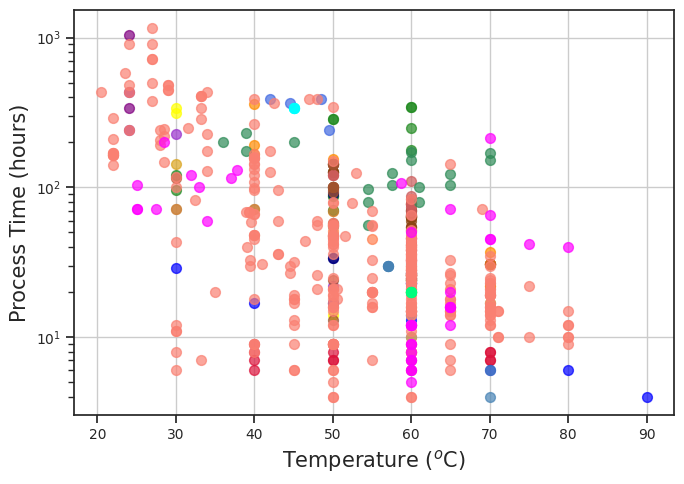

In [118]:
#%% Process time Vs Temperatures, groupby Variety
groups = df.groupby('Variety')

colors = {'indianred', 'dodgerblue', 'darkred',  'aqua', 'tomato', 'darkgreen',
          'coral', 'purple', 'sienna', 'seagreen', 'chocolate', 'deeppink', 
          'saddlebrown', 'midnightblue', 'peru', 'steelblue', 'darkorange', 'teal',
          'goldenrod', 'darkgreen', 'gold', 'olive', 'yellow', 'olivedrab', 
          'chartreuse','royalblue', 'forestgreen', 'magenta', 'darkkhaki', 'salmon',
          'navy', 'hotpink', 'blue', 'springgreen', 'indigo', 'darkorchid', 'crimson',
          'cyan',}

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
for (name, group), color in zip(groups, colors):
    ax.scatter(group['Temp'], group['hours'], marker='o', s = 50, label=name,
               color = color, alpha=0.7, edgecolor=color)
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
#plt.legend(fontsize=15);
#plt.xscale('log'); 
plt.yscale('log'); 
plt.grid(True); plt.tight_layout()

### Wrt Air Velocity

/tmp/ipykernel_498/1270188167.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


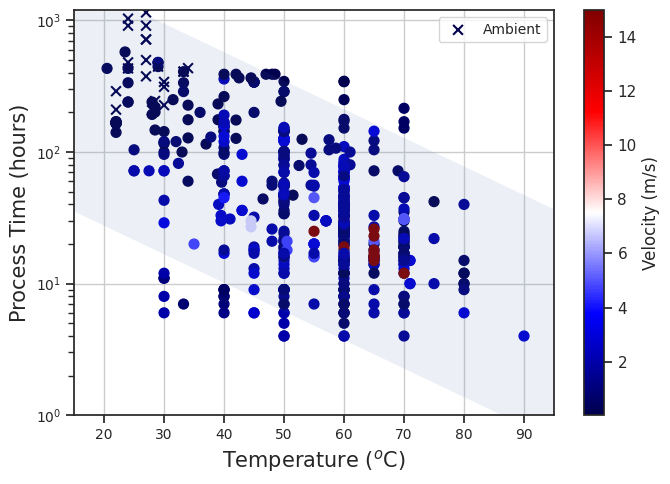

In [113]:
#%% Process time Vs Temperatures, groupby Velocity Subplot 40degC X 200hours
import numpy as np
hour_lim = 1200 ; Temp_lim = 100
hours = df.loc[(df['Vel'] != 0.01) & (df['hours']<=hour_lim) & (df['Temp']<=Temp_lim)]['hours']
Vel   = df.loc[(df['Vel'] != 0.01) & (df['hours']<=hour_lim) & (df['Temp']<=Temp_lim)]['Vel']
Temp  = df.loc[(df['Vel'] != 0.01) & (df['hours']<=hour_lim) & (df['Temp']<=Temp_lim)]['Temp']

hours_a = df.loc[(df['Vel'] == 0.01) & (df['hours']<=hour_lim) & (df['Temp']<=Temp_lim)]['hours']
Temp_a  = df.loc[(df['Vel'] == 0.01) & (df['hours']<=hour_lim) & (df['Temp']<=Temp_lim)]['Temp']
Vel_a   = df.loc[(df['Vel'] == 0.01) & (df['hours']<=hour_lim) & (df['Temp']<=Temp_lim)]['Vel']

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp, hours, marker='o', s = 50, c= Vel, cmap = 'seismic',)
ax.scatter(Temp_a, hours_a, marker='x', s = 50, c= Vel_a, cmap = 'seismic', label = 'Ambient')
ax.plot([10, 100],[563.83*np.exp(-0.05*10), 563.83*np.exp(-0.05*100) ], lw = 150, alpha=0.1, ) 
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
#plt.xlim([20, 45]); plt.ylim([0, 240])
plt.xlim([15, 95]); plt.ylim([1, 1200])
my_norm = mpl.colors.Normalize(vmin=Vel.min(), vmax=Vel.max())
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Velocity (m/s)')
#plt.xscale('log'); 
plt.yscale('log'); 
plt.legend(fontsize=10); plt.grid(True);plt.tight_layout()


/tmp/ipykernel_498/1821005219.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


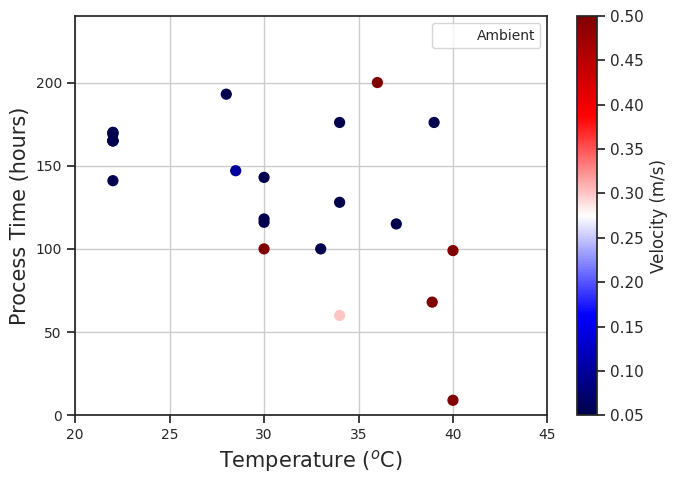

In [114]:
#%% Process time Vs Temperatures, groupby Velocity Subplot 40degC X 200hours, below Velocity 
co = 0.5 #( m/s)
hours = df.loc[(df['Vel'] != 0.01) & (df['hours']<=200) & (df['Temp']<=40) & (df['Vel'] <= co)]['hours']
Vel   = df.loc[(df['Vel'] != 0.01) & (df['hours']<=200) & (df['Temp']<=40) & (df['Vel'] <= co)]['Vel']
Temp  = df.loc[(df['Vel'] != 0.01) & (df['hours']<=200) & (df['Temp']<=40) & (df['Vel'] <= co)]['Temp']

hours_a = df.loc[(df['Vel'] == 0.01) & (df['hours']<=200) & (df['Temp']<=40) & (df['Vel'] <= co)]['hours']
Temp_a  = df.loc[(df['Vel'] == 0.01) & (df['hours']<=200) & (df['Temp']<=40) & (df['Vel'] <= co)]['Temp']
Vel_a   = df.loc[(df['Vel'] == 0.01) & (df['hours']<=200) & (df['Temp']<=40) & (df['Vel'] <= co)]['Vel']

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp, hours, marker='o', s = 50, c= Vel, cmap = 'seismic',)
ax.scatter(Temp_a, hours_a, marker='x', s = 50, c= Vel_a, cmap = 'seismic', label = 'Ambient')

plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
plt.xlim([20, 45]); plt.ylim([0, 240])
my_norm = mpl.colors.Normalize(vmin=Vel.min(), vmax=Vel.max())
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Velocity (m/s)')
plt.legend(fontsize=10); plt.grid(True);plt.tight_layout()

## Process Time Vs. Velocity

/tmp/ipykernel_498/1957439578.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Vel_a, hours_a, marker='x', s = 50, c= Temp_a, cmap = 'seismic', label = 'Ambient')
/tmp/ipykernel_498/1957439578.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


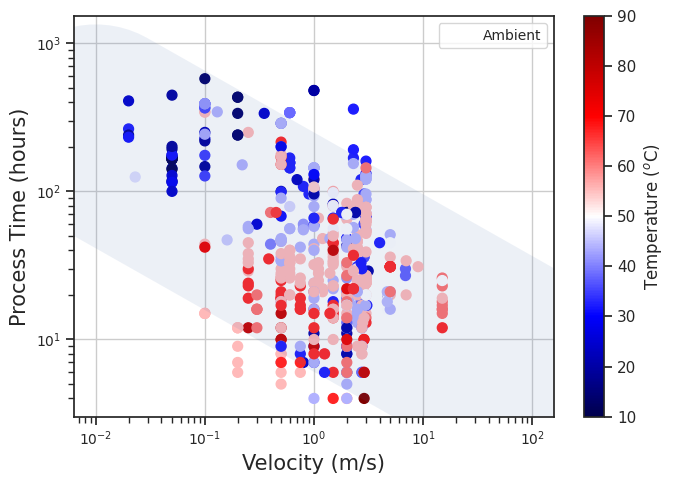

In [115]:
#%% Process time Vs Velocity , groupby Temperature

hours = df.loc[df['Vel'] != 0.01]['hours']
Vel   = df.loc[df['Vel'] != 0.01]['Vel']
Temp  = df.loc[df['Vel'] != 0.01]['Temp']

hours_a = df.loc[df['Vel'] == 0.01]['hours']
Vel_a   = df.loc[df['Vel'] == 0.01]['Vel']


fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Vel, hours, marker='o', s = 50, c= Temp, cmap = 'seismic',)
ax.scatter(Vel_a, hours_a, marker='x', s = 50, c= Temp_a, cmap = 'seismic', label = 'Ambient')
ax.plot([0.01, 100],[38.887*0.01**-0.417, 38.887*100**-0.417 ], lw = 150, alpha=0.1)
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Velocity (m/s)', fontsize=15); plt.xticks(fontsize=10)
plt.xscale('log')
plt.legend(fontsize=10); 

my_norm = mpl.colors.Normalize(vmin=10, vmax=90)
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Temperature ($^{o}$C)')
plt.xscale('log'); plt.yscale('log'); 
plt.grid(True);plt.tight_layout();

/tmp/ipykernel_498/1729714282.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm,


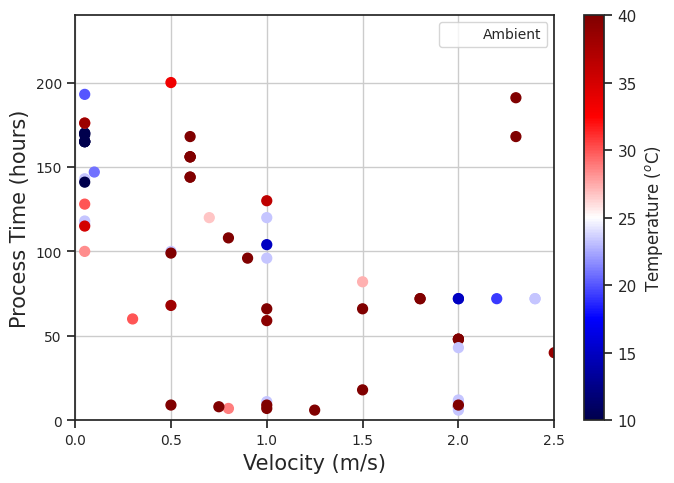

In [116]:
#%% Process time Vs Velocity    , groupby Temperature SubPlot
hours = df.loc[(df['Vel'] != 0.01) & (df['hours']<=200) & (df['Temp']<=40)]['hours']
Vel   = df.loc[(df['Vel'] != 0.01) & (df['hours']<=200) & (df['Temp']<=40)]['Vel']
Temp  = df.loc[(df['Vel'] != 0.01) & (df['hours']<=200) & (df['Temp']<=40)]['Temp']

hours_a = df.loc[(df['Vel'] == 0.01) & (df['hours']<=200) & (df['Temp']<=40)]['hours']
Temp_a  = df.loc[(df['Vel'] == 0.01) & (df['hours']<=200) & (df['Temp']<=40)]['Temp']
Vel_a   = df.loc[(df['Vel'] == 0.01) & (df['hours']<=200) & (df['Temp']<=40)]['Vel']

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Vel, hours, marker='o', s = 50, c= Temp, cmap = 'seismic',)
ax.scatter(Vel_a, hours_a, marker='x', s = 50, c= Temp_a, cmap = 'seismic', label = 'Ambient')
plt.xlim([0, 2.5]); plt.ylim([0, 240])
plt.ylabel('Process Time (hours)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Velocity (m/s)', fontsize=15); plt.xticks(fontsize=10)
plt.legend(fontsize=10); 

my_norm = mpl.colors.Normalize(vmin=10, vmax=40)
fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Temperature ($^{o}$C)')
#plt.xscale('log'); plt.yscale('log'); 
plt.grid(True);plt.tight_layout();

## Diffusivity Vs. Temperature

#### Wrt Authors

In [15]:
# Feature Addition
df = df_org.copy()
df["Paper"] = df['Year'].map(str) + ' ' + df['Author'].map(str)

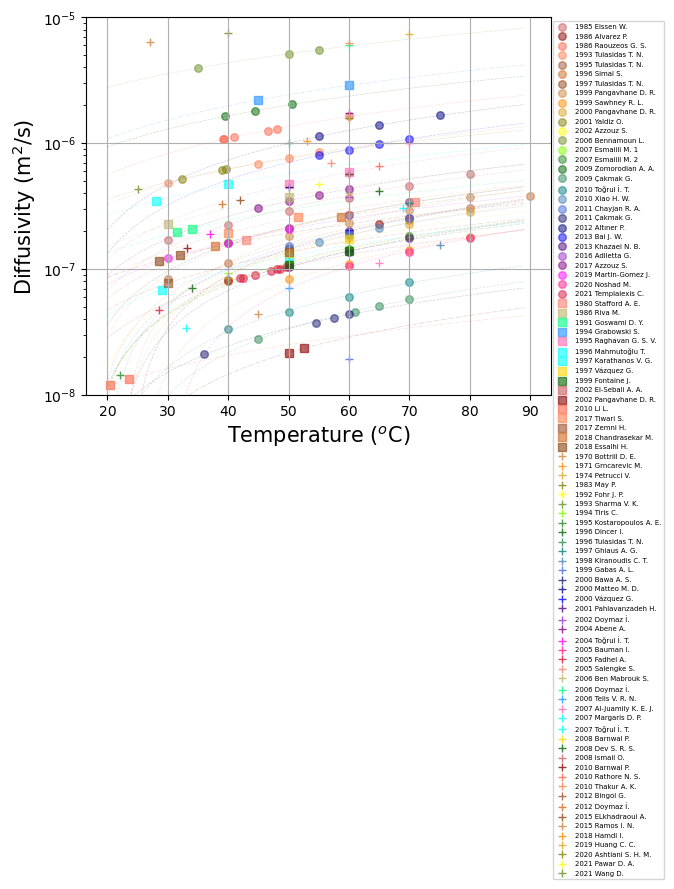

In [16]:
#%% Diffusivity  Vs Temperatures, groupby Papers

Paperlist3=[];Paperlist2=[];Paperlist1=[];Paperlist=[]
for i in range(len(set(df["Paper"]))): 
    dfbyAuthor = df[(df["Paper"] == sorted(list(df["Paper"].unique()))[i])]
    if len(list(set(dfbyAuthor['Temp']))) >= 3:
        Paperlist3.append(list(dfbyAuthor['Paper'])[0])
    elif len(list(set(dfbyAuthor['Temp']))) == 2:
        Paperlist2.append(list(dfbyAuthor['Paper'])[0])
    else:
        Paperlist1.append(list(dfbyAuthor['Paper'])[0])
Paperlist = sorted(Paperlist3) + sorted(Paperlist2) + sorted(Paperlist1) 
#% Plot

colors = ['indianred', 'darkred',     'tomato',    'coral',      'sienna', 
          'chocolate', 'saddlebrown', 'peru',      'darkorange', 'goldenrod',
          'olive',     'yellow',      'olivedrab', 'chartreuse', 'forestgreen',
          'darkgreen', 'seagreen',    'teal',      'steelblue',  'royalblue',
          'midnightblue', 'navy', 'blue', 'indigo', 'darkorchid', 'purple',
          'magenta', 'deeppink', 'crimson', 'salmon', 'darkkhaki', 'springgreen',
          'dodgerblue', 'hotpink', 'aqua', 'cyan', 'gold', 'darkgreen']
colors += colors; colors += colors

fig, ax = plt.subplots(figsize=(6, 5), squeeze=True, dpi = 100)
for i in range(len(set(df["Paper"]))):
    #print("Plotting for paper:", Paperlist[i] )
    dfbyAuthor = df[(df["Paper"] == Paperlist[i])].drop_duplicates(subset="Temp", keep='first', inplace=False, ignore_index=False)
    Deff = np.array(dfbyAuthor["Diff_m"]) *1E-3
    Temp = np.array(dfbyAuthor["Temp"])
    
    
    if len(Temp) >= 3:
        mark  = "o"
        lstyl = 'dashed'
        alf   = 0.5
    elif len(Temp) == 2:
        mark  = "s"
        lstyl = 'dashdot'
        alf   = 0.6
    else:
        mark  = "+"
        lstyl = 'dotted'
        alf   = 0.8
        
    ax.scatter(Temp, Deff, s=30, marker=mark, linewidth=1, label=Paperlist[i], 
               c=colors[i], alpha=alf, edgecolor=colors[i])
    
    if len(Temp) >= 2:
        a,b = np.polyfit(Temp.tolist(), Deff.tolist(), 1)
        tl =  a*np.arange(20,90) + b
        plt.plot(np.arange(20,90), tl, c=colors[i], 
                 linestyle=lstyl ,linewidth=0.5,  alpha=0.2)
    else: pass
    
plt.ylabel('Diffusivity (m$^{2}$/s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
plt.yscale("log");plt.grid(True)
plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.ylim((20,90)); plt.ylim((1E-8,1E-5)); plt.tight_layout();

#### Wrt Grape Variety

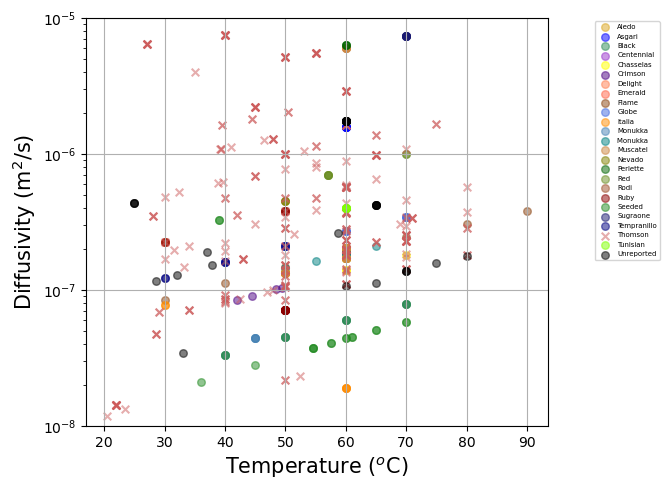

In [17]:
#%% Diffusivity  Vs Temperatures, groupby Variety

grp_Variety = df.groupby('Variety')
    
colors_dict = { "Thomson":"indianred",
               "Ruby":"darkred",
               "Emerald":"tomato",
               "Delight":"coral",
               "Rodi":"sienna",
               "Unreported":"black",
               "Flame":"saddlebrown",
               "Muscatel":"peru",
               "Italia":"darkorange",
               "Aledo":"goldenrod",
               "Nevado":"olive",
               "Chasselas":"yellow",
               "Red":"olivedrab",
               "Tunisian":"chartreuse",
               "Seeded":"forestgreen",
               "Perlette":"darkgreen",
               "Black":"seagreen",
               "Monukka ":"teal",
               "Monukka":"steelblue",
               "Globe":"royalblue",
               "Sugraone":"midnightblue",
               "Tempranillo":"navy",
               "Asgari":"blue",
               "Crimson":"indigo",
               "Centennial":"darkorchid",}

markers_dict = { "Thomson":"x",
               "Ruby":"o",
               "Emerald":"o",
               "Delight":"o",
               "Rodi":"o",
               "Unreported":"o",
               "Flame":"o",
               "Muscatel":"o",
               "Italia":"o",
               "Aledo":"o",
               "Nevado":"o",
               "Chasselas":"o",
               "Red":"o",
               "Tunisian":"o",
               "Seeded":"o",
               "Perlette":"o",
               "Black":"o",
               "Monukka ":"o",
               "Monukka":"o",
               "Globe":"o",
               "Sugraone":"o",
               "Tempranillo":"o",
               "Asgari":"o",
               "Crimson":"o",
               "Centennial":"o",}


fig, ax = plt.subplots(figsize=(7, 5), squeeze=True, dpi = 100)
for name, group in grp_Variety:
    ax.scatter(group['Temp'], group['Diff_m']*1E-3, 
               marker = markers_dict[str(name)],  
               s = 30, label=name,
               color = colors_dict[str(name)], 
               alpha=0.5, 
               edgecolor=colors_dict[str(name)])
    
plt.ylabel('Diffusivity (m$^{2}$/s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
plt.yscale("log");plt.grid(True)
plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.ylim((20,90)); plt.ylim((1E-8,1E-5)); plt.tight_layout();

#### Wrt Drying technique

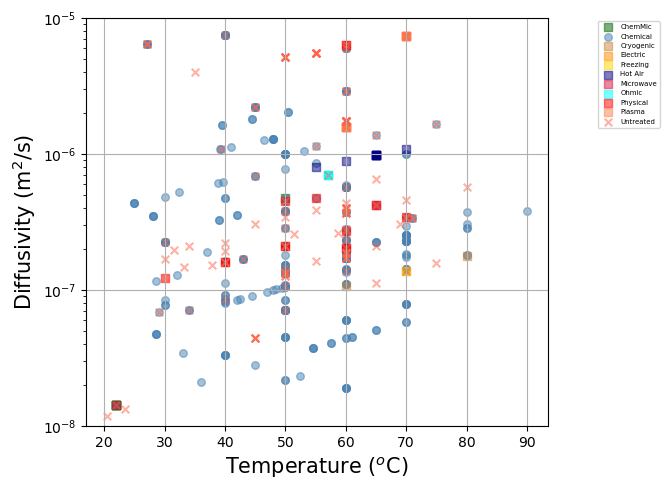

In [18]:
#%% Diffusivity  Vs Temperatures, groupby Pretreatments

grp_Pretreatment = df.groupby('Pretreatment')
    
colors_dict = {"Chemical" : "steelblue" ,
               "Untreated": "tomato",
               "ChemMic": "darkgreen",
               "Microwave": "crimson",
               "Physical": "red",
               "Ohmic": "aqua",
               "Electric": "darkorange",
               "Hot Air": "navy",
               "Plasma": "coral",
               "Freezing": "gold",
               "Cryogenic": "peru" }

markers_dict = {"Chemical" : "o" ,
               "Untreated": "x",
               "ChemMic": "s",
               "Microwave": "s",
               "Physical": "s",
               "Ohmic": "s",
               "Electric": "s",
               "Hot Air": "s",
               "Plasma": "s",
               "Freezing": "s",
               "Cryogenic": "s" }


fig, ax = plt.subplots(figsize=(7, 5), squeeze=True, dpi = 100)
for name, group in grp_Pretreatment:
    ax.scatter(group['Temp'], group['Diff_m']*1E-3, 
               marker = markers_dict[str(name)],  
               s = 30, label=name,
               color = colors_dict[str(name)], 
               alpha=0.5, 
               edgecolor=colors_dict[str(name)])
    
plt.ylabel('Diffusivity (m$^{2}$/s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
plt.yscale("log");plt.grid(True)
plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.ylim((20,90)); plt.ylim((1E-8,1E-5)); plt.tight_layout();

#### Wrt Pretreatment Temperature

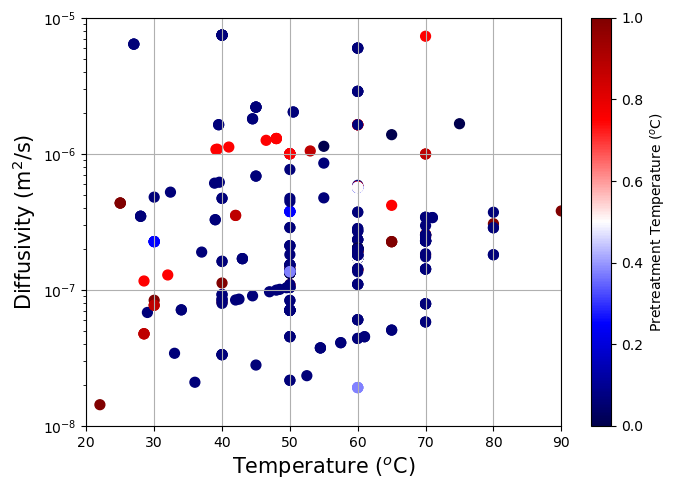

In [19]:
#%% Diffusivity  Vs Temperatures, groupby Pretreatments Temperatures
pTemp = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['P_temp']#.dropna()
Temp  = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['Temp']#.dropna()
Deff  = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['Diff_m']#.dropna()

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp,Deff*1E-3, marker='o', s = 50, c= pTemp, cmap = 'seismic',)
plt.ylabel('Diffusivity (m$^{2}$/s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
#my_norm = colors.normalize(vmin=pTemp.min(), vmax=pTemp.max())
fig.colorbar(cm.ScalarMappable(#norm=my_norm, 
                                cmap='seismic'), 
             orientation="vertical", label='Pretreatment Temperature ($^{o}$C)')
plt.yscale("log");plt.grid(True)
#plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.xlim((20,90)); plt.ylim((1E-8,1E-5)); plt.tight_layout();

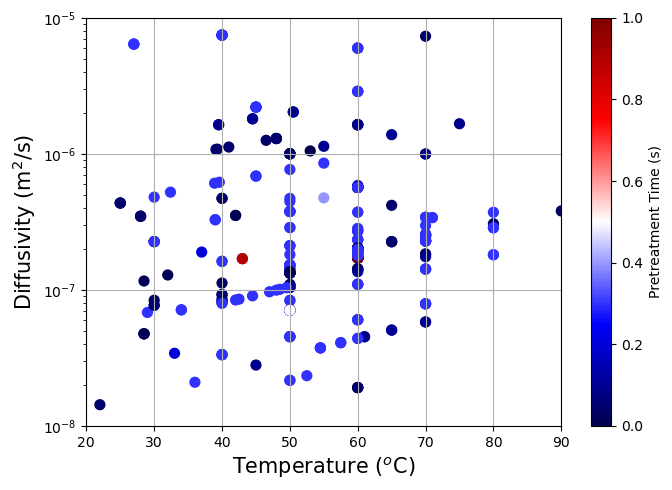

In [20]:
#%% Diffusivity  Vs Temperatures, groupby Pretreatments Time
pTime = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['P_time']#.dropna()
Temp  = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['Temp']#.dropna()
Deff  = df.loc[(df['P_temp'] != 'Untreated') & (df['P_temp'] != 'NotApplicable') & (df['Pretreatment'] == 'Chemical')]['Diff_m']#.dropna()

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(Temp,Deff*1E-3, marker='o', s = 50, c= pTime, cmap = 'seismic',)
plt.ylabel('Diffusivity (m$^{2}$/s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
#my_norm = colors.Normalize(vmin=pTemp.min(), vmax=pTemp.max())
fig.colorbar(cm.ScalarMappable(#norm=my_norm, 
            cmap='seismic'), 
             orientation="vertical", label='Pretreatment Time (s)')
plt.yscale("log");plt.grid(True)
#plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.xlim((20,90)); plt.ylim((1E-8,1E-5)); plt.tight_layout();

#### Wrt Drying Technique

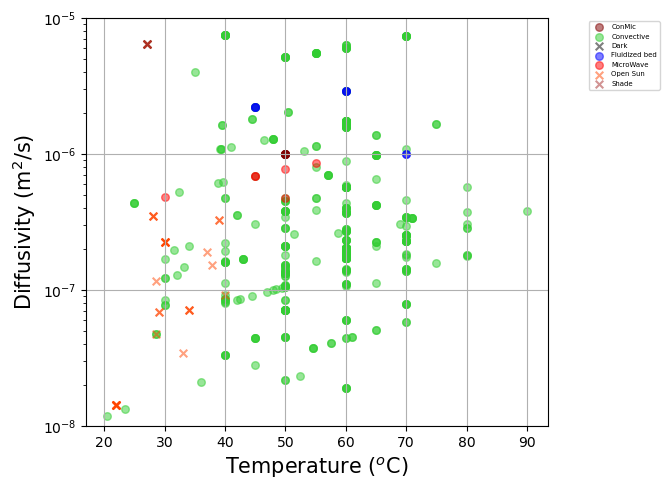

In [21]:
#%% Diffusivity  Vs Temperatures, groupby Techniques
grp_Technique = df.groupby('Technique')

colors_dict = {'MicroWave'        : 'red',
          'Convective'            : 'limegreen',
          'ConMic': 'maroon',
          'Fluidized bed'         : 'blue',
          'Open Sun'              : 'orangered',
          'Shade'                 : 'brown',
          'Dark'                  : 'black',}

markers_dict = {'MicroWave'       : 'o',
          'Convective'            : 'o',
          'ConMic': 'o',
          'Fluidized bed'         : 'o',
          'Open Sun'              : 'x',
          'Shade'                 : 'x',
          'Dark'                  : 'x',}

fig, ax = plt.subplots(figsize=(7, 5), squeeze=True, dpi = 100)
for name, group in grp_Technique:
    ax.scatter(group['Temp'], group['Diff_m']*1E-3, 
               marker = markers_dict[str(name)],  
               s = 30, label=name,
               color = colors_dict[str(name)], 
               alpha=0.5, 
               edgecolor=colors_dict[str(name)])
    
plt.ylabel('Diffusivity (m$^{2}$/s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Temperature ($^{o}$C)', fontsize=15); plt.xticks(fontsize=10)
plt.yscale("log");plt.grid(True)
plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.ylim((20,90)); plt.ylim((1E-8,1E-5)); plt.tight_layout();

## MTC Vs. Air Velocity

#### Wrt Authors

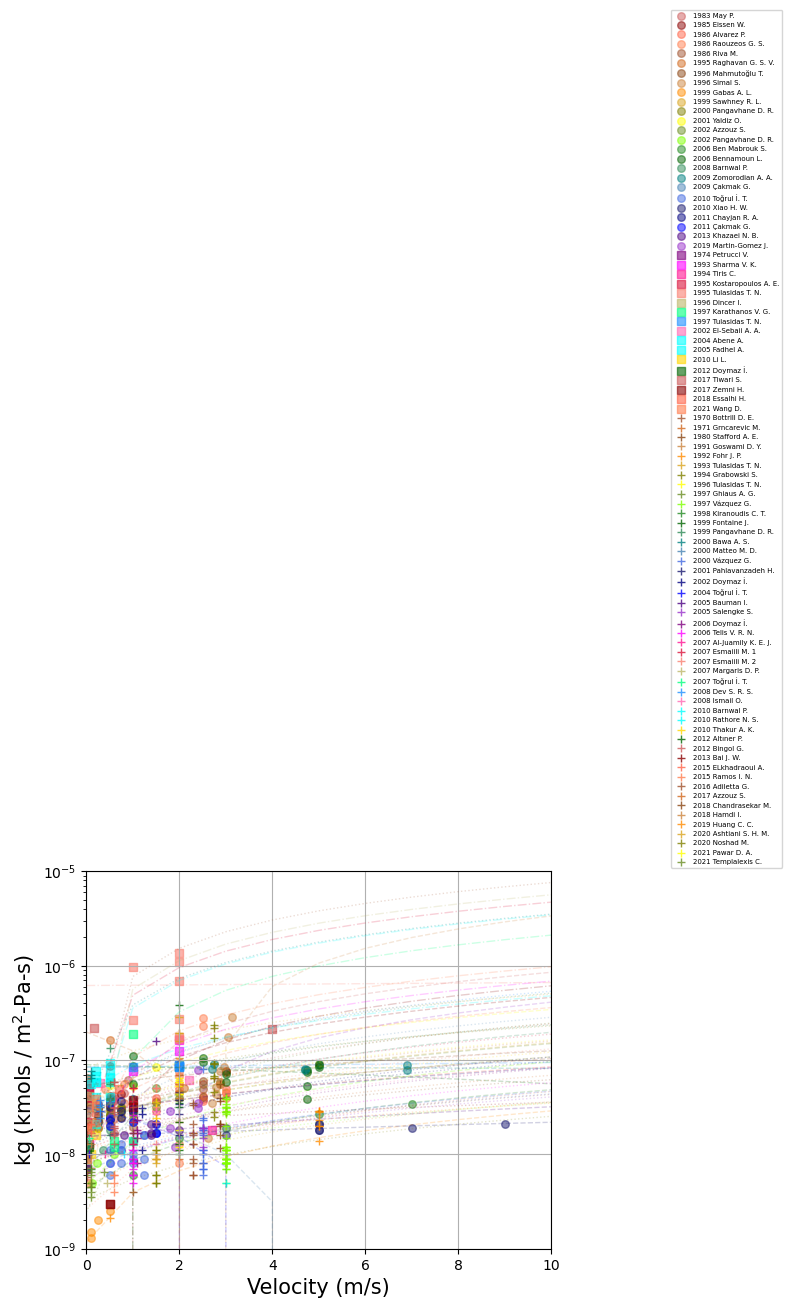

In [22]:
#%% MassTranCoef Vs Velocity    , groupby Papers

Paperlist3=[];Paperlist2=[];Paperlist1=[];Paperlist=[]

for i in range(len(df["Paper"].unique())): 
    dfbyAuthor = df[(df["Paper"] == sorted(list(df["Paper"].unique()))[i])]
    if len(list(dfbyAuthor['Vel'].unique())) >= 3:
        Paperlist3.append(list(dfbyAuthor['Paper'])[0])
    elif len(list(dfbyAuthor['Vel'].unique())) == 2:
        Paperlist2.append(list(dfbyAuthor['Paper'])[0])
    else:
        Paperlist1.append(list(dfbyAuthor['Paper'])[0])
Paperlist = sorted(Paperlist3) + sorted(Paperlist2) + sorted(Paperlist1) 
#% Plot

colors = ['indianred', 'darkred',     'tomato',    'coral',      'sienna', 
          'chocolate', 'saddlebrown', 'peru',      'darkorange', 'goldenrod',
          'olive',     'yellow',      'olivedrab', 'chartreuse', 'forestgreen',
          'darkgreen', 'seagreen',    'teal',      'steelblue',  'royalblue',
          'midnightblue', 'navy', 'blue', 'indigo', 'darkorchid', 'purple',
          'magenta', 'deeppink', 'crimson', 'salmon', 'darkkhaki', 'springgreen',
          'dodgerblue', 'hotpink', 'aqua', 'cyan', 'gold', 'darkgreen']
colors += colors; colors += colors

fig, ax = plt.subplots(figsize=(6, 5), squeeze=True, dpi = 100)
for i in range(len(set(df["Paper"]))):
    #print("Plotting for paper:", Paperlist[i] )
    dfbyAuthor = df[(df["Paper"] == Paperlist[i])]#.drop_duplicates(subset="Vel", keep='first', inplace=False, ignore_index=False)
    kg   = np.array(dfbyAuthor["kg_m"]) * 1E-9
    Vel  = np.array(dfbyAuthor["Vel"])
    
    
    if i < 25:
        mark  = "o"
        lstyl = 'dashed'
        alf   = 0.5
    elif (i > 24) & (i < 42):
        mark  = "s"
        lstyl = 'dashdot'
        alf   = 0.6
    else:
        mark  = "+"
        lstyl = 'dotted'
        alf   = 0.8
        
        
    ax.scatter(Vel, kg, s=30, marker=mark, linewidth=1, label=Paperlist[i], 
               c=colors[i], alpha=alf, edgecolor=colors[i])
    
    if len(Vel) >= 3:
        a,b = np.polyfit(Vel.tolist(), kg.tolist(), 1)
        tl  =  a*np.arange(0,15) + b
        # tl =  a*np.arange(0,15)**b + c
        #tl =  a*np.arange(0,15)**2 +  b*np.arange(0,15) + c
        plt.plot(np.arange(0,15), tl, c=colors[i], 
                  linestyle=lstyl ,linewidth=1,  alpha=0.2)
    else: pass
    
plt.ylabel('kg (kmols / m$^{2}$-Pa-s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Velocity (m/s)', fontsize=15); plt.xticks(fontsize=10)
plt.yscale("log");plt.grid(True)
plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.xlim((0,10)); plt.ylim((1E-9,1E-5)); 
plt.tight_layout();

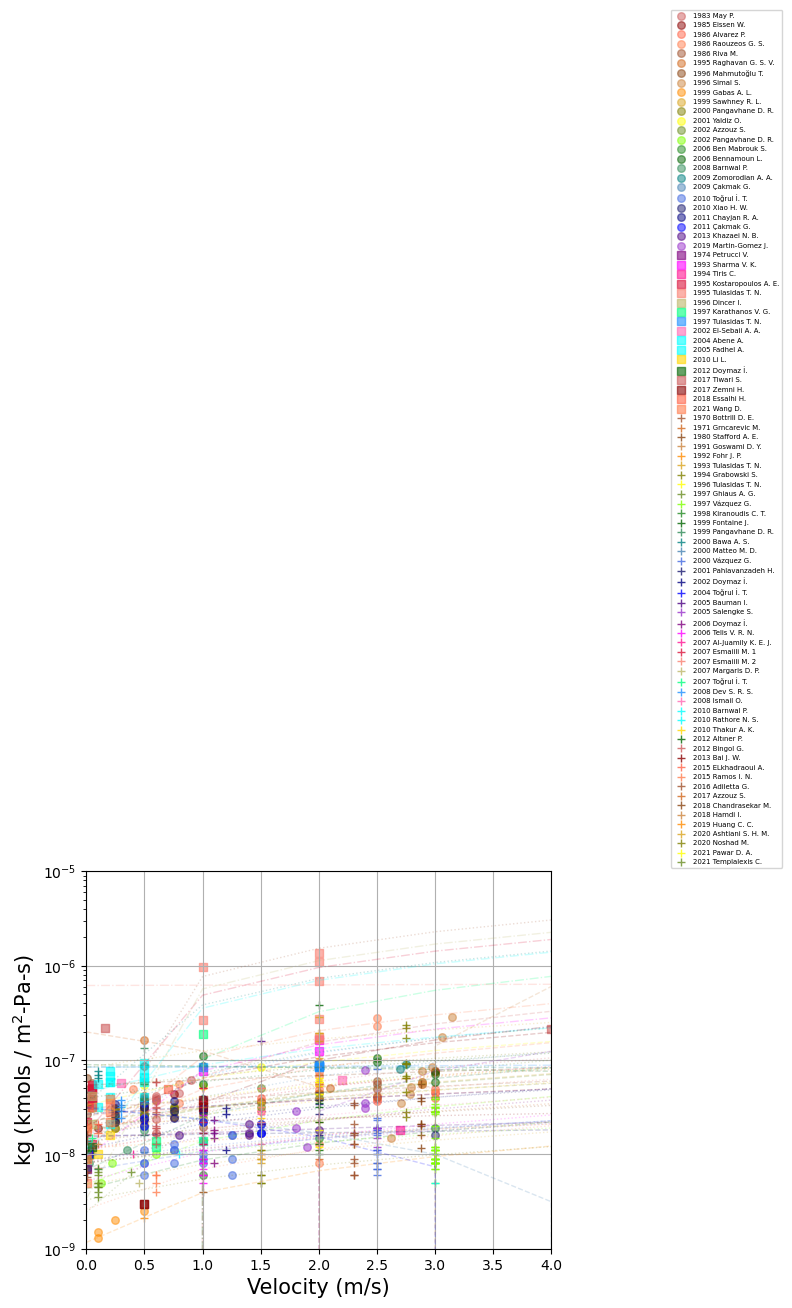

In [23]:
#%% MassTranCoef Vs Velocity    , groupby Papers

Paperlist3=[];Paperlist2=[];Paperlist1=[];Paperlist=[]

for i in range(len(df["Paper"].unique())): 
    dfbyAuthor = df[(df["Paper"] == sorted(list(df["Paper"].unique()))[i])]
    if len(list(dfbyAuthor['Vel'].unique())) >= 3:
        Paperlist3.append(list(dfbyAuthor['Paper'])[0])
    elif len(list(dfbyAuthor['Vel'].unique())) == 2:
        Paperlist2.append(list(dfbyAuthor['Paper'])[0])
    else:
        Paperlist1.append(list(dfbyAuthor['Paper'])[0])
Paperlist = sorted(Paperlist3) + sorted(Paperlist2) + sorted(Paperlist1) 
#% Plot

colors = ['indianred', 'darkred',     'tomato',    'coral',      'sienna', 
          'chocolate', 'saddlebrown', 'peru',      'darkorange', 'goldenrod',
          'olive',     'yellow',      'olivedrab', 'chartreuse', 'forestgreen',
          'darkgreen', 'seagreen',    'teal',      'steelblue',  'royalblue',
          'midnightblue', 'navy', 'blue', 'indigo', 'darkorchid', 'purple',
          'magenta', 'deeppink', 'crimson', 'salmon', 'darkkhaki', 'springgreen',
          'dodgerblue', 'hotpink', 'aqua', 'cyan', 'gold', 'darkgreen']
colors += colors; colors += colors

fig, ax = plt.subplots(figsize=(6, 5), squeeze=True, dpi = 100)
for i in range(len(set(df["Paper"]))):
    #print("Plotting for paper:", Paperlist[i] )
    dfbyAuthor = df[(df["Paper"] == Paperlist[i])]#.drop_duplicates(subset="Vel", keep='first', inplace=False, ignore_index=False)
    kg   = np.array(dfbyAuthor["kg_m"]) * 1E-9
    Vel  = np.array(dfbyAuthor["Vel"])
    
    
    if i < 25:
        mark  = "o"
        lstyl = 'dashed'
        alf   = 0.5
    elif (i > 24) & (i < 42):
        mark  = "s"
        lstyl = 'dashdot'
        alf   = 0.6
    else:
        mark  = "+"
        lstyl = 'dotted'
        alf   = 0.8
        
        
    ax.scatter(Vel, kg, s=30, marker=mark, linewidth=1, label=Paperlist[i], 
               c=colors[i], alpha=alf, edgecolor=colors[i])
    
    if len(Vel) >= 3:
        a,b = np.polyfit(Vel.tolist(), kg.tolist(), 1)
        tl  =  a*np.arange(0,15) + b
        # tl =  a*np.arange(0,15)**b + c
        #tl =  a*np.arange(0,15)**2 +  b*np.arange(0,15) + c
        plt.plot(np.arange(0,15), tl, c=colors[i], 
                  linestyle=lstyl ,linewidth=1,  alpha=0.2)
    else: pass
    
plt.ylabel('kg (kmols / m$^{2}$-Pa-s)', fontsize=15); plt.yticks(fontsize=10)
plt.xlabel('Velocity (m/s)', fontsize=15); plt.xticks(fontsize=10)
plt.yscale("log");plt.grid(True)
plt.legend(bbox_to_anchor=(1.25, 1.0), fontsize=5)
plt.xlim((0,4)); plt.ylim((1E-9,1E-5)); 
plt.tight_layout();